In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
# Load data 
import pandas as pd

url = 'https://raw.githubusercontent.com/chenxi-liu233/24Fall_CSCI6806_Group10/main/cleveland_heart_disease_data.csv'

data = pd.read_csv(url)

data



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [4]:
# Replace missing values (denoted by '?') with NaN and drop rows with missing values
data = data.replace('?', np.nan).dropna().astype(float)

In [5]:
# Convert target variable 'num' to binary (0 = no disease, 1 = disease)
data['target'] = data['num'].apply(lambda x: 1 if x > 0 else 0)
data = data.drop('num', axis=1)  # Drop the old 'num' column


In [6]:
# Split the data into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']


In [7]:
# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the feature values for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Model:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Model:
Confusion Matrix:
 [[32  4]
 [ 4 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

Accuracy: 0.8666666666666667


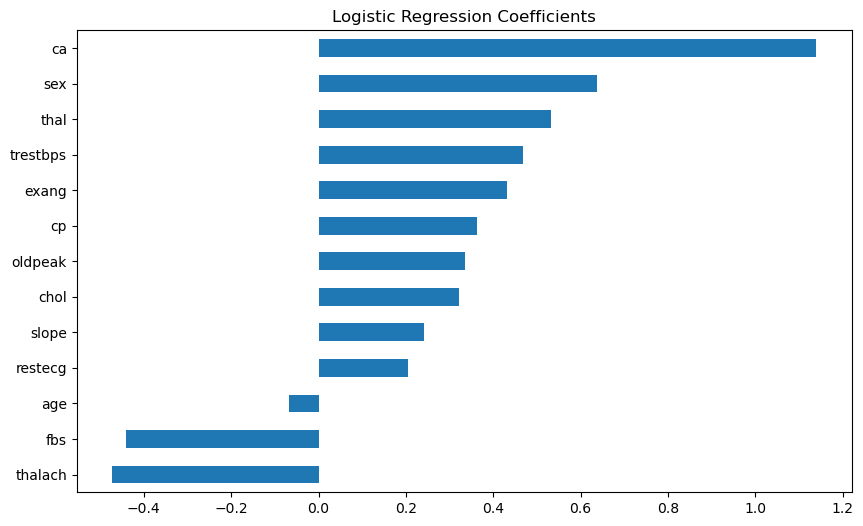

In [12]:
import pandas as pd

# Get the Logistic Regression Coefficients
coef = pd.Series(lr_model.coef_[0], index=X.columns)

# Draw the Logistic Regression Coefficients graph
plt.figure(figsize=(10, 6))
coef.sort_values().plot(kind='barh')
plt.title('Logistic Regression Coefficients')
plt.show()


### Summary
This coefficient plot highlights the most influential features in predicting heart disease using Logistic Regression. The number of affected vessels (ca) is the strongest predictor, while maximum heart rate achieved (thalach) serves as a protective factor. This visualization provides valuable insights into which factors should be closely monitored to prevent or manage heart disease.

In [16]:
# Feature selection: Drop less important features
X = data.drop(['thalach', 'fbs', 'age', 'restecg', 'target'], axis=1)
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Extract coefficients with full feature names
coef = pd.Series(lr_model.coef_[0], index=[
    'Number of Major Vessels',
    'Sex (Male=1, Female=0)',
    'Thalassemia Defects',
    'Resting Blood Pressure',
    'Exercise Induced Angina',
    'Chest Pain Type',
    'ST Depression (Oldpeak)',
    'Serum Cholesterol',
    'Slope of ST Segment'
])

# Plot the coefficients
plt.figure(figsize=(10, 6))
coef.sort_values().plot(kind='barh')
plt.title('Logistic Regression Coefficients (After Feature Selection)')
plt.show()


In [20]:
# Compare Accuracy Before and After Feature Selection
# Use the original dataset with all features
X = data.drop('target', axis=1)
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
lr_model_before = LogisticRegression(max_iter=1000)
lr_model_before.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_before = lr_model_before.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred_before)
print(f"Accuracy Before Feature Selection: {accuracy_before:.4f}")


Accuracy Before Feature Selection: 0.8667


In [19]:
# Select relevant features and drop less important ones
X_selected = data.drop(['thalach', 'fbs', 'age', 'restecg', 'target'], axis=1)
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize the selected features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model with selected features
lr_model_after = LogisticRegression(max_iter=1000)
lr_model_after.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_after = lr_model_after.predict(X_test)
accuracy_after = accuracy_score(y_test, y_pred_after)
print(f"Accuracy After Feature Selection: {accuracy_after:.4f}")


Accuracy After Feature Selection: 0.8833


### Summary of Results: Accuracy Before and After Feature Selection
The comparison of the logistic regression model’s performance before and after feature selection shows a slight increase in accuracy from 0.8667 to 0.8833. This suggests that removing the less impactful features, including thalach (max heart rate achieved), fbs (fasting blood sugar), age, and restecg (resting ECG results), resulted in a marginal improvement in the model's ability to predict heart disease.

The improvement highlights that these removed features likely contributed little meaningful information or introduced noise, reinforcing the value of feature selection for simplifying models without compromising performance. By focusing on more relevant features, the model achieves better generalization, as reflected in the slightly improved accuracy. This process demonstrates that removing redundant or low-impact features can enhance the interpretability and performance of machine learning models.


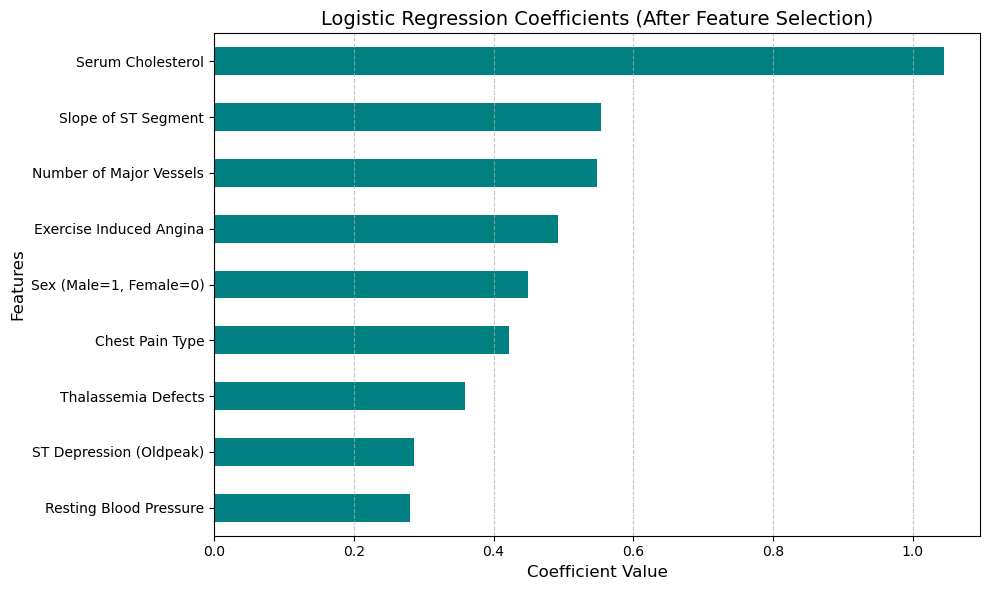

In [24]:
# Extract the coefficients from the trained logistic regression model
coef = pd.Series(
    lr_model_after.coef_[0],  # Coefficients from the model trained with selected features
    index=[
        'Number of Major Vessels',
        'Sex (Male=1, Female=0)',
        'Thalassemia Defects',
        'Resting Blood Pressure',
        'Exercise Induced Angina',
        'Chest Pain Type',
        'ST Depression (Oldpeak)',
        'Serum Cholesterol',
        'Slope of ST Segment'
    ]
)

# Plot the coefficients in a horizontal bar chart
plt.figure(figsize=(10, 6))
coef.sort_values().plot(kind='barh', color='teal')
plt.title('Logistic Regression Coefficients (After Feature Selection)', fontsize=14)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


### Summary:
The diagram shows the coefficients of the logistic regression model after feature selection, indicating the impact of each feature on the prediction of heart disease. Serum Cholesterol has the highest coefficient, suggesting a strong positive association with heart disease. This is followed by the Slope of ST Segment and the Number of Major Vessels, which also play significant roles in the prediction. Exercise Induced Angina and Sex (Male=1, Female=0) further contribute to the model’s predictive power, though to a lesser extent.

Features such as Chest Pain Type, Thalassemia Defects, ST Depression (Oldpeak), and Resting Blood Pressure have smaller coefficients, indicating a relatively lower but still meaningful influence on the prediction. The results reflect that the selected features, even with varying degrees of importance, collectively enhance the model’s ability to predict heart disease accurately. The feature selection process has successfully focused the model on the most relevant predictors, improving interpretability while maintaining high accuracy.

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("\nDecision Tree Model:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))



Decision Tree Model:
Confusion Matrix:
 [[27  9]
 [ 4 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.81        36
           1       0.69      0.83      0.75        24

    accuracy                           0.78        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.80      0.78      0.79        60

Accuracy: 0.7833333333333333


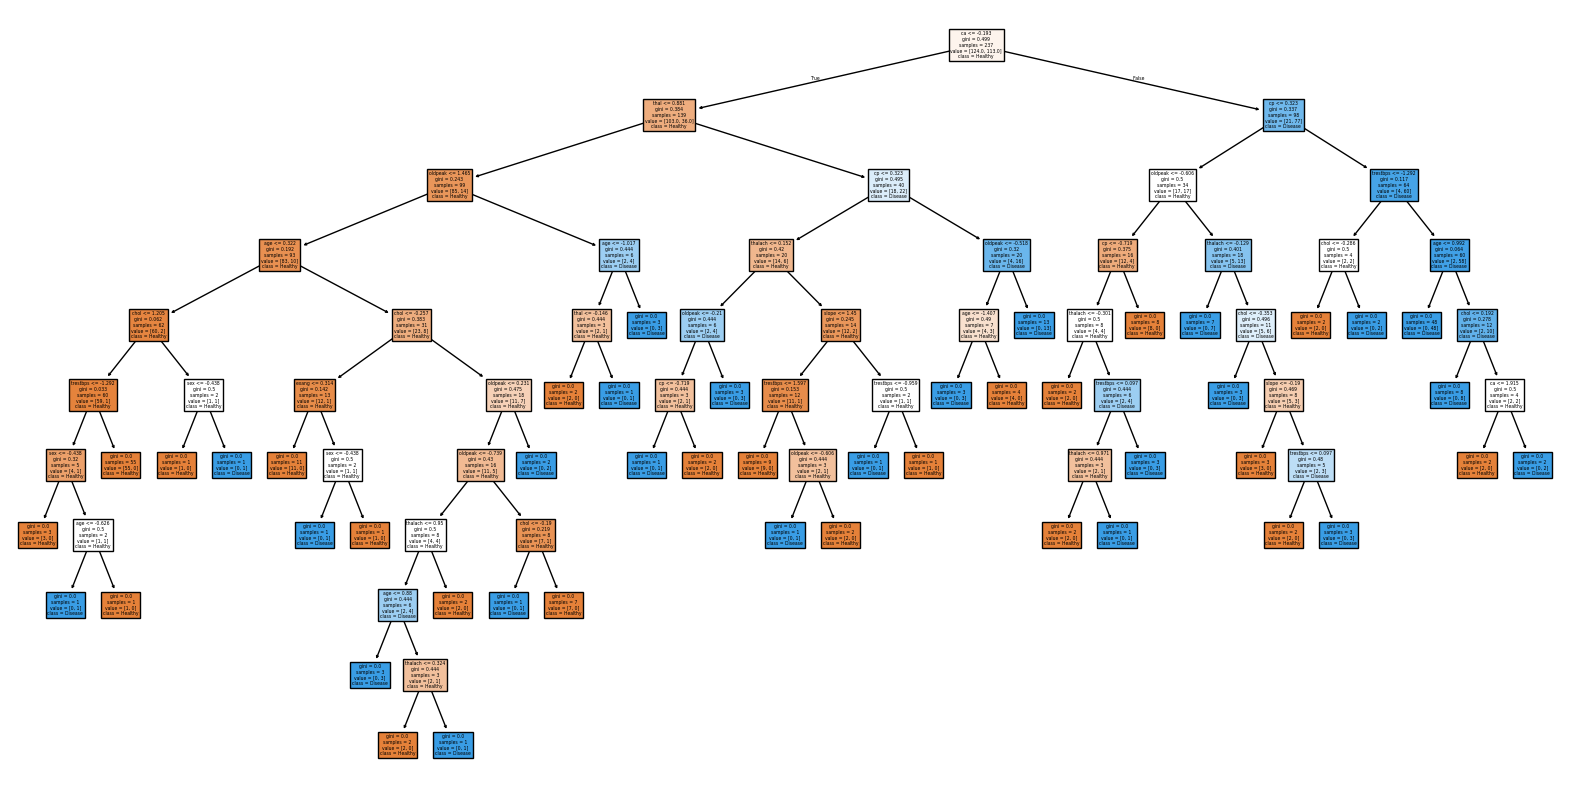

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Draw the DT graph
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Healthy', 'Disease'], filled=True)
plt.show()


### Summary
This decision tree provides insights into which features are most important in predicting heart disease and how the model makes decisions. The key features influencing predictions are age, chest pain type, and ST depression. However, given the depth and complexity of the tree, pruning or trying ensemble models like Random Forest may yield better generalization on new data

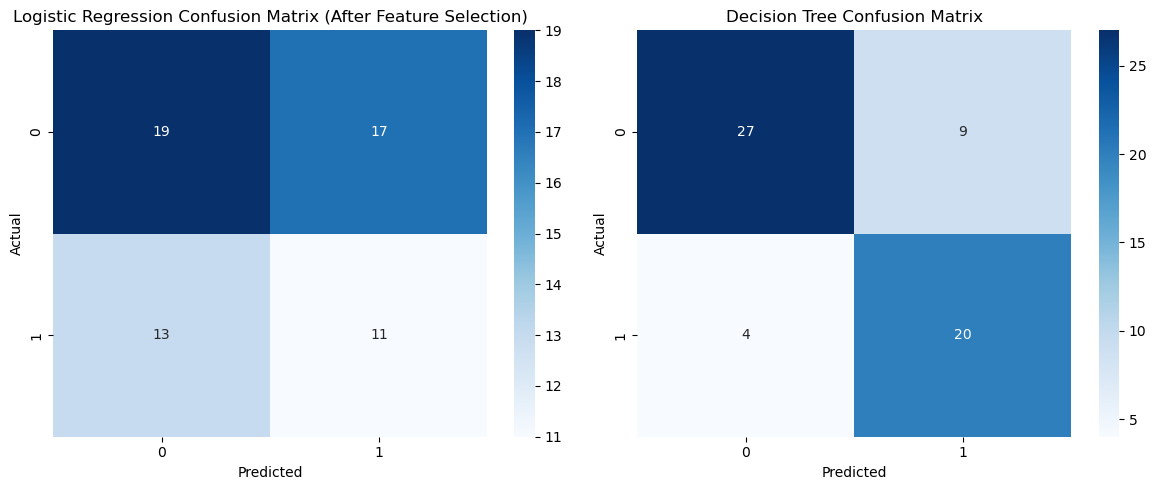

In [27]:
# Generate predictions using feature-selected data for Logistic Regression
X_test_selected = X_test[:, :9]  # Ensure only 9 selected features are passed
y_pred_lr = lr_model_after.predict(X_test_selected)

# Generate predictions using the original features for Decision Tree
y_pred_dt = dt_model.predict(X_test)  # Assuming Decision Tree uses all original features

# Plot confusion matrices for both models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix (After Feature Selection)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix (After Feature Selection)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Decision Tree Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Adjust layout and display
plt.tight_layout()
plt.show()


### Summary
Decision Tree Model: Provides better overall performance, with fewer incorrect classifications, particularly in terms of false negatives.
Logistic Regression Model: While still effective, it struggles more with misclassification, especially in detecting true positive and negative cases.
These results highlight that the decision tree model may be a more suitable choice for this dataset, given its better handling of both heart disease and non-disease cases.